# 911 Calls Project

Analyzing 911 Calls from Kaggle
https://www.kaggle.com/mchirico/montcoalert/home

Emergency (911) Calls: Fire, Traffic, EMS for Montgomery County, PA

** Importing numpy and pandas **

In [2]:
import numpy as np
import pandas as pd

** Importing visualization libraries and set %matplotlib inline. **

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

** Reading the csv file **

In [4]:
df = pd.read_csv('911.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
lat          99492 non-null float64
lng          99492 non-null float64
desc         99492 non-null object
zip          86637 non-null float64
title        99492 non-null object
timeStamp    99492 non-null object
twp          99449 non-null object
addr         98973 non-null object
e            99492 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [83]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,3,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,3,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,3,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,3,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,3,2015-12-10


** Top 5 zip codes for 911 Calls **

In [10]:
df['zip'].value_counts().head()

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

** Top 5 townships (twp) for 911 calls **

In [11]:
df['twp'].value_counts().head()

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

** Number of unique title codes **

In [12]:
df['title'].nunique()

110

## Creating new features

** Reason is our new column in the dataframe: we would like to clean the information in the title column to only depict either EMS, Fire, or Traffic **

In [13]:
df['Reason'] = df['title'].apply(lambda x: x.split()[0][:-1])

In [81]:
df['Reason'].head()

0     EMS
1     EMS
2    Fire
3     EMS
4     EMS
Name: Reason, dtype: object

** Most common Reasons for a 911 call **

In [84]:
df['Reason'].value_counts().head()

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

** Creating a countplot of 911 calls by Reason. **

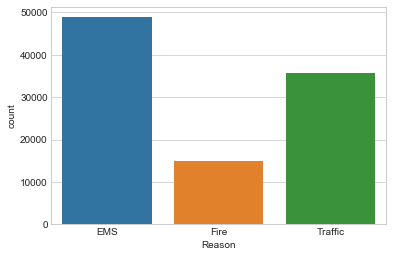

In [85]:
sns.countplot(x='Reason',data=df)

In [86]:
type(df['timeStamp'][0]) 

pandas._libs.tslibs.timestamps.Timestamp

** Converting the timeStamp to Datetime format **

In [87]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

** Creating new columns for Hour, Month, and Day of Week, by using the timeStamp information **

In [88]:
df['Hour'] = df['timeStamp'].apply(lambda x: x.hour)
df['Month'] = df['timeStamp'].apply(lambda x: x.month)
df['Day of Week'] = df['timeStamp'].apply(lambda x: x.dayofweek)

In [89]:
df['Day of Week'].head()

0    3
1    3
2    3
3    3
4    3
Name: Day of Week, dtype: int64

**Creating a dictionary to label Day of Week**

In [90]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [91]:
df['Day of Week'] = df['Day of Week'].map(dmap)
df['Day of Week'].head()

0    Thu
1    Thu
2    Thu
3    Thu
4    Thu
Name: Day of Week, dtype: object

** Creating a countplot of the Day of Week column with hue based off of the Reason column **

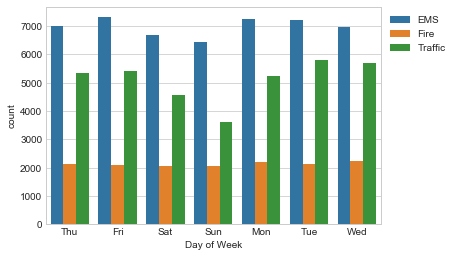

In [92]:
sns.countplot(x='Day of Week', data=df, hue='Reason')
plt.legend(bbox_to_anchor=(1, 1), loc=2)

**Doing the same for Month:**

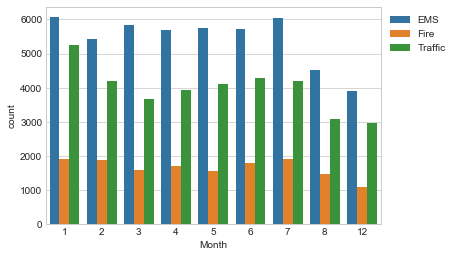

In [93]:
sns.countplot(x='Month', data=df, hue='Reason')
plt.legend(bbox_to_anchor=(1, 1), loc=2)

We notice that months 9, 10, and 11 are missing.

** Grouping the frequency of each entry by Month **

In [94]:
byMonth = df.groupby('Month').count()
byMonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of Week,Date
Month,,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423,11423


** We are assuming the lat column indicates when a call was received. Hence, we plot lat vs the index (Month) **

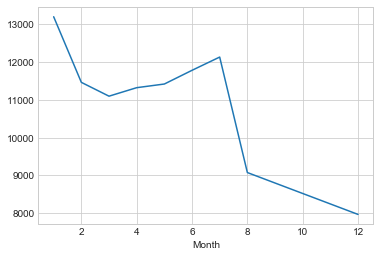

In [95]:
byMonth['lat'].plot()

** Using linear regression to find plot for the missing months **

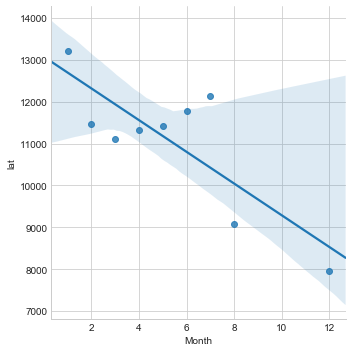

In [96]:
sns.lmplot(x='Month',y='lat',data=byMonth.reset_index())

** Creating a new column that contains the date of incidence ** 

In [97]:
df['Date'] = df['timeStamp'].apply(lambda x: x.date())
df['Date'].head()

0    2015-12-10
1    2015-12-10
2    2015-12-10
3    2015-12-10
4    2015-12-10
Name: Date, dtype: object

** Using groupby to aggregate the frequency of calls based on the date**

In [98]:
byDate = df.groupby('Date').count()
byDate.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week
Date,,,,,,,,,,,,,
2015-12-10,115,115,115,100,115,115,115,113,115,115,115,115,115
2015-12-11,396,396,396,333,396,396,395,391,396,396,396,396,396
2015-12-12,403,403,403,333,403,403,403,401,403,403,403,403,403
2015-12-13,319,319,319,280,319,319,319,317,319,319,319,319,319
2015-12-14,447,447,447,387,447,447,446,445,447,447,447,447,447


**Creating a Plot of the frequency of Calls vs Date **

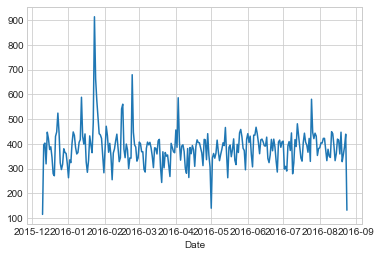

In [99]:
byDate['lat'].plot()

** Recreating each plot based on the reason for 911. Frequency of *Insert Reason* 911 calls vs Date**  

Text(0.5,1,'Traffic')

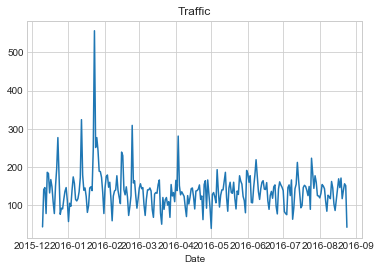

In [100]:
df[df['Reason'] == 'Traffic'].groupby('Date').count()['lat'].plot()
plt.title('Traffic')

Text(0.5,1,'Fire')

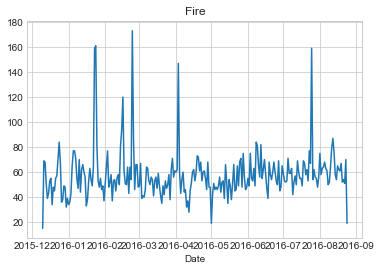

In [101]:
df[df['Reason'] == 'Fire'].groupby('Date').count()['lat'].plot()
plt.title('Fire')

Text(0.5,1,'EMS')

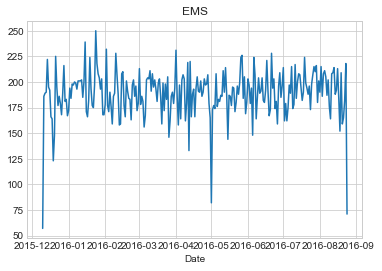

In [102]:
df[df['Reason'] == 'EMS'].groupby('Date').count()['lat'].plot()
plt.title('EMS')

____
** Creating a pivot table based on Hour and Day of Week**

In [103]:
dayHour = df.groupby(by=['Day of Week','Hour']).count()['lat'].unstack()
dayHour.head()

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354


** Heat map **

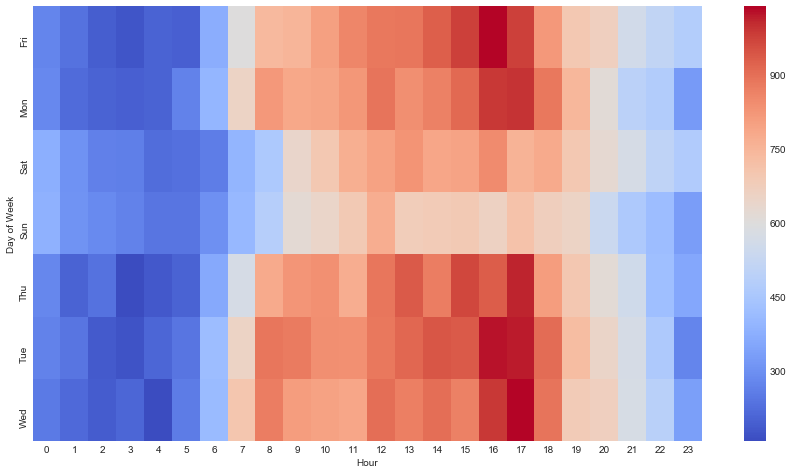

In [104]:
plt.figure(figsize=(15,8))
sns.heatmap(dayHour, cmap='coolwarm')

** Cluster map **

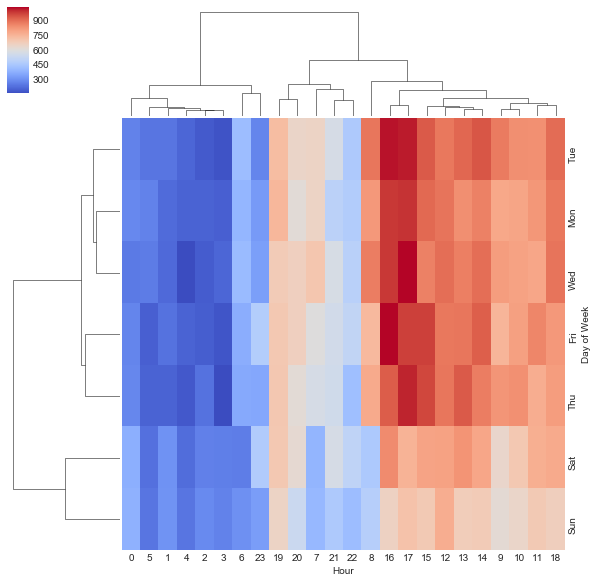

In [105]:

sns.clustermap(dayHour, cmap='coolwarm')

** Pivot table with Month and Day of Week **

In [106]:
dayMonth = df.groupby(by=['Day of Week','Month'])['lat'].count().unstack()
dayMonth.head()

Month,1,2,3,4,5,6,7,8,12
Day of Week,,,,,,,,,
Fri,1970,1581,1525,1958,1730,1649,2045,1310,1065
Mon,1727,1964,1535,1598,1779,1617,1692,1511,1257
Sat,2291,1441,1266,1734,1444,1388,1695,1099,978
Sun,1960,1229,1102,1488,1424,1333,1672,1021,907
Thu,1584,1596,1900,1601,1590,2065,1646,1230,1266


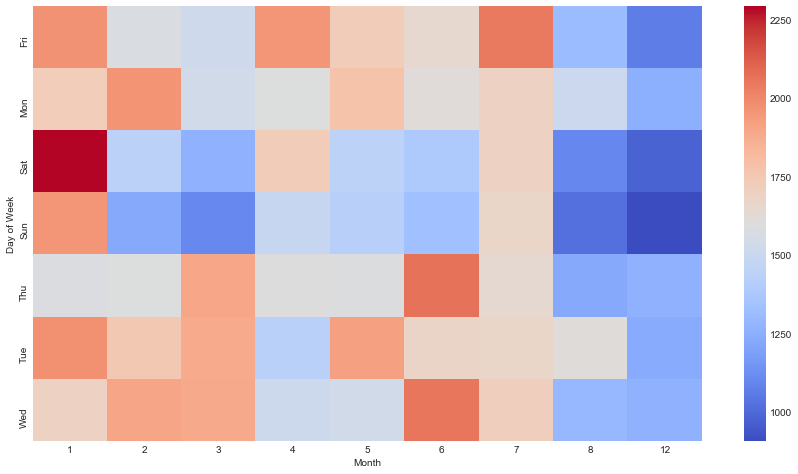

In [107]:
plt.figure(figsize=(15,8))
sns.heatmap(dayMonth, cmap='coolwarm')

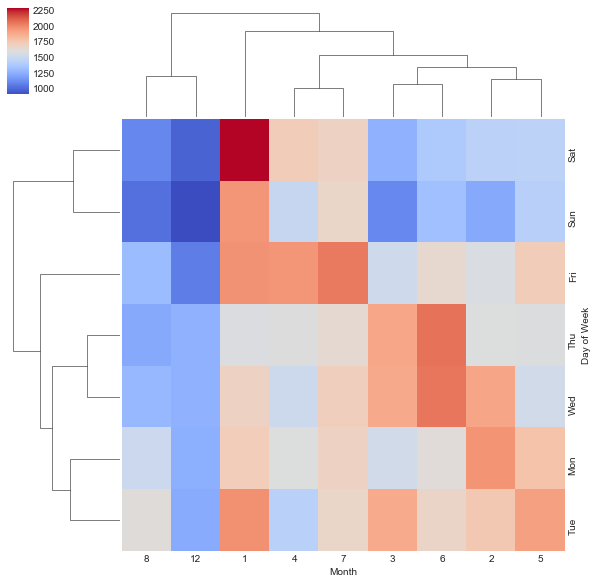

In [108]:
sns.clustermap(dayMonth, cmap='coolwarm')

** Thank you! **